<a href="https://colab.research.google.com/github/navinkrishna-tb/stock_market_analysis/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>Project - Stock Market Analysis</h1>

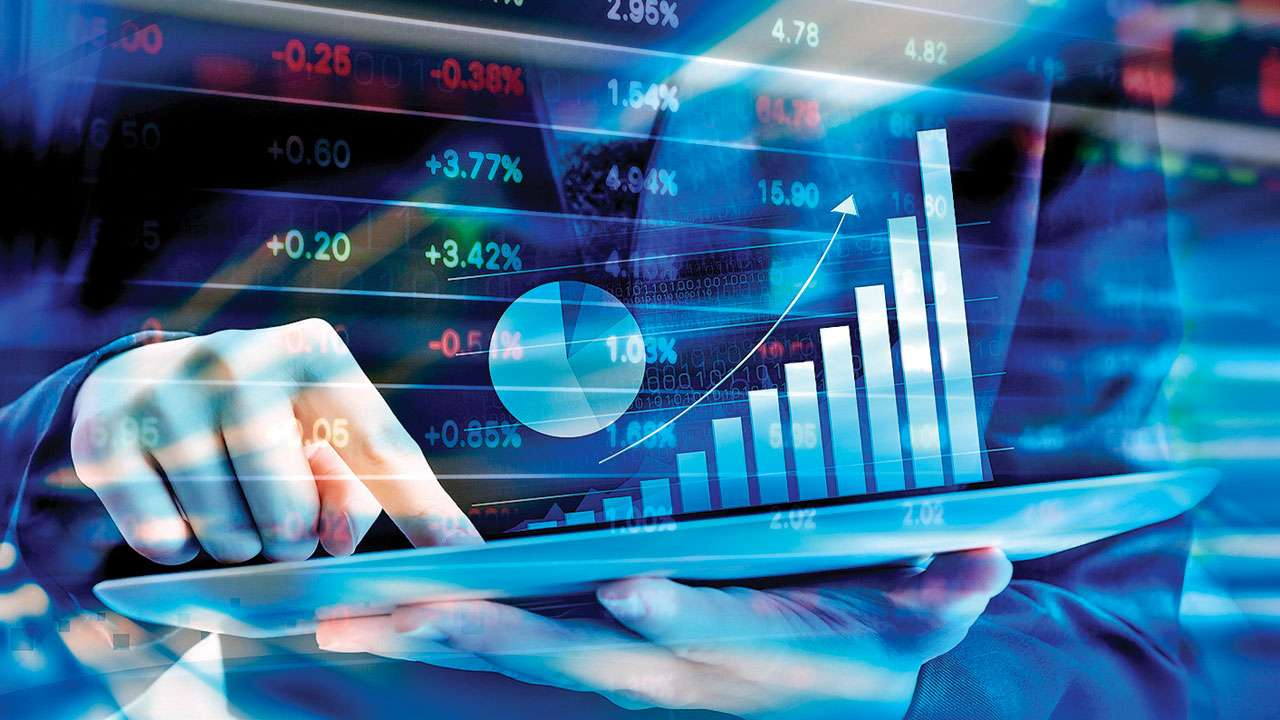

In this notebook we will be looking data from stock market. We are analysing the stocks using pandas, matplotlib and plotly. Visualising the movement of stock price, volume and daily return of each stocks.



In [32]:
#importing the necessary pacakges
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Importing the nifty 50 stocks data on 19th jan 2021 to get the best performing stocks on the day.
Source : www.nseindia.com

In [80]:
df = pd.read_csv("MW-NIFTY-50-19-Jan-2021.csv")
df.head()

,SYMBOL,OPEN,HIGH,LOW,PREV_CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG 15-Jan-2020,30 D % CHNG15-Dec-2020
0,NIFTY 50,"14,371.65","14,546.05","14,350.85","14,281.30","14,521.15",239.85,1.68,546108304,"330,845,509,561.11","14,653.35","7,511.10",15.62,3.78
1,BAJAJFINSV,"8,400.00","8,978.00","8,400.00","8,354.60","8,919.00",564.40,6.76,1379718,"12,123,775,226.52","9,950.00","3,985.30",-14.00,-9.34
2,BAJFINANCE,"4,765.10","4,994.95","4,752.00","4,719.85","4,968.00",248.15,5.26,4767465,"23,364,011,074.80","5,372.50","1,783.00",11.53,-10.14
3,TATAMOTORS,251.50,261.70,251.30,245.95,258.75,12.80,5.20,136861059,"35,072,014,979.34",264.65,63.50,24.66,36.22
4,HINDALCO,246.50,252.65,243.35,243.15,251.95,8.80,3.62,10254337,"2,541,537,425.45",275.40,84.90,15.76,-2.70


## Selecting stocks
- For picking some stocks on different industries Check the variance of % change.

- Select some of the stocks randomly as a threshold of 2% return for analysis.
- Sort the dataframe on the basis of maximum return.

In [83]:
print("Maximum % change of nifty50 stocks on 19th jan 2021: ",df['%CHNG'].max())
print("Min % change of nifty50 stocks on 19th jan 2021: ",df['%CHNG'].min())

Maximum % change of nifty50 stocks on 19th jan 2021:  6.76
Min % change of nifty50 stocks on 19th jan 2021:  -0.36


In [36]:
df_top = df[df['%CHNG']>2].sort_values(by="%CHNG", ascending=False)
df_top.head(30)

,SYMBOL,OPEN,HIGH,LOW,PREV_CLOSE,LTP,CHNG,%CHNG,VOLUME,VALUE,52W H,52W L,365 D % CHNG 15-Jan-2020,30 D % CHNG15-Dec-2020
1,BAJAJFINSV,"8,400.00","8,978.00","8,400.00","8,354.60","8,919.00",564.40,6.76,1379718,"12,123,775,226.52","9,950.00","3,985.30",-14.00,-9.34
2,BAJFINANCE,"4,765.10","4,994.95","4,752.00","4,719.85","4,968.00",248.15,5.26,4767465,"23,364,011,074.80","5,372.50","1,783.00",11.53,-10.14
3,TATAMOTORS,251.50,261.70,251.30,245.95,258.75,12.80,5.20,136861059,"35,072,014,979.34",264.65,63.50,24.66,36.22
4,HINDALCO,246.50,252.65,243.35,243.15,251.95,8.80,3.62,10254337,"2,541,537,425.45",275.40,84.90,15.76,-2.70
5,SUNPHARMA,586.90,603.00,583.35,581.45,602.00,20.55,3.53,5500391,"3,250,511,065.36",628.00,312.00,27.90,1.12
6,ADANIPORTS,516.00,535.00,516.00,515.50,533.00,17.50,3.39,6694907,"3,533,839,710.88",542.45,203.00,33.00,11.27
7,HDFC,"2,585.00","2,680.80","2,575.00","2,566.50","2,651.05",84.55,3.29,3569359,"9,388,806,220.01","2,777.15","1,473.45",4.59,3.51
8,GRASIM,"1,002.00","1,052.50","1,002.00",999.20,"1,032.00",32.80,3.28,4059040,"4,211,416,361.60","1,052.50",385.05,30.06,9.84
9,JSWSTEEL,386.20,397.75,381.60,383.10,395.65,12.55,3.28,5842513,"2,279,748,572.60",413.10,132.50,40.15,5.19
10,CIPLA,802.50,825.40,802.50,801.75,825.00,23.25,2.90,3791378,"3,092,854,517.28",864.60,355.30,66.93,1.05


# Analysis
We are selecting 6 stocks namely "JSWSTEEL", "SUNPHARMA", "HINDALCO", "CIPLA", "BAJAJFINSV", "HDFC", "TATASTEEL".We are downloading the stock history from yahoo finance website.

We will be answering the following questions along the way:
1. What is the change of stocks price over time?
2. What is the change in volume of stock over time?
3. What was the moving average of different stocks?
4. What is the distribution of each feature?
5. What is the daily return of the stock on an average?



# Loading and Preprocessing

In [41]:
def call_df(tick):    
    df = pd.read_csv(tick + ".NS.csv")
    df.dropna(axis=0,inplace=True)
    df["tick"] = tick
    df["Date"] = pd.to_datetime(df["Date"])
    return df

In [42]:
jsw = call_df("JSWSTEEL")
jsw.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,tick
4393,2021-01-12,398.950012,412.950012,397.049988,399.549988,399.549988,6708618.0,JSWSTEEL
4394,2021-01-13,401.549988,407.399994,394.149994,402.950012,402.950012,6885599.0,JSWSTEEL
4395,2021-01-14,404.350006,405.649994,394.000000,396.399994,396.399994,4886430.0,JSWSTEEL
4396,2021-01-15,398.000000,402.549988,391.200012,394.200012,394.200012,7329969.0,JSWSTEEL
4397,2021-01-18,393.500000,394.000000,375.500000,383.100006,383.100006,10605461.0,JSWSTEEL


In [43]:
hindalco= call_df("HINDALCO")
hindalco.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,tick
6311,2021-01-12,260.450012,270.500000,260.450012,264.350006,264.350006,13136084.0,HINDALCO
6312,2021-01-13,265.500000,268.399994,258.850006,262.649994,262.649994,13300126.0,HINDALCO
6313,2021-01-14,262.700012,265.100006,259.549988,261.399994,261.399994,7601547.0,HINDALCO
6314,2021-01-15,262.000000,263.299988,251.100006,253.350006,253.350006,17738049.0,HINDALCO
6315,2021-01-18,252.300003,254.250000,240.600006,243.149994,243.149994,17989695.0,HINDALCO


In [44]:
cipla = call_df("CIPLA")
cipla.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,tick
6311,2021-01-12,860.000000,864.599976,841.000000,843.150024,843.150024,4338010.0,CIPLA
6312,2021-01-13,847.349976,852.000000,832.500000,841.700012,841.700012,3596529.0,CIPLA
6313,2021-01-14,841.700012,847.549988,829.000000,840.900024,840.900024,3652930.0,CIPLA
6314,2021-01-15,839.000000,844.900024,821.000000,823.700012,823.700012,3137877.0,CIPLA
6315,2021-01-18,822.000000,826.650024,796.200012,801.750000,801.750000,3742440.0,CIPLA


In [45]:
bajaj = call_df("BAJAJFINSV")
bajaj.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,tick
3119,2021-01-12,9004.000000,9069.900391,8922.500000,8959.000000,8959.000000,577045.0,BAJAJFINSV
3120,2021-01-13,9004.799805,9030.000000,8710.150391,8793.650391,8793.650391,514078.0,BAJAJFINSV
3121,2021-01-14,8814.000000,8929.950195,8675.000000,8747.349609,8747.349609,568437.0,BAJAJFINSV
3122,2021-01-15,8754.799805,8826.200195,8610.000000,8636.099609,8636.099609,519651.0,BAJAJFINSV
3123,2021-01-18,8636.099609,8636.099609,8273.700195,8354.599609,8354.599609,634436.0,BAJAJFINSV


In [46]:
hdfc = call_df("HDFC")
hdfc.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,tick
4616,2021-01-12,2738.000000,2760.000000,2719.000000,2747.550049,2747.550049,3412213.0,HDFC
4617,2021-01-13,2760.449951,2777.149902,2651.100098,2670.899902,2670.899902,5582165.0,HDFC
4618,2021-01-14,2670.000000,2699.000000,2647.149902,2684.050049,2684.050049,4253567.0,HDFC
4619,2021-01-15,2661.000000,2688.449951,2615.600098,2632.750000,2632.750000,2582955.0,HDFC
4620,2021-01-18,2645.949951,2647.399902,2550.000000,2566.500000,2566.500000,5154593.0,HDFC


In [47]:
sunpharma = call_df("SUNPHARMA")
sunpharma.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,tick
6311,2021-01-12,621.000000,623.900024,607.049988,609.650024,609.650024,6747035.0,SUNPHARMA
6312,2021-01-13,611.000000,614.500000,597.250000,602.299988,602.299988,6186661.0,SUNPHARMA
6313,2021-01-14,602.299988,611.650024,596.400024,607.049988,607.049988,6730284.0,SUNPHARMA
6314,2021-01-15,609.000000,616.799988,598.099976,604.299988,604.299988,8389544.0,SUNPHARMA
6315,2021-01-18,604.099976,607.349976,578.450012,581.450012,581.450012,7414570.0,SUNPHARMA


In [48]:
sunpharma = call_df("TATASTEEL")
sunpharma.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,tick
6311,2021-01-12,695.000000,724.500000,691.099976,694.900024,694.900024,24525484.0,TATASTEEL
6312,2021-01-13,701.450012,714.549988,693.000000,709.150024,709.150024,19353871.0,TATASTEEL
6313,2021-01-14,710.000000,714.450012,697.099976,706.349976,706.349976,11540858.0,TATASTEEL
6314,2021-01-15,712.000000,721.500000,697.650024,705.900024,705.900024,20688437.0,TATASTEEL
6315,2021-01-18,708.000000,708.750000,659.500000,666.700012,666.700012,25045226.0,TATASTEEL


In [49]:
company_name = ["JSWSTEEL", "SUNPHARMA", "HINDALCO", "CIPLA", "BAJAJFINSV", "HDFC", 'TATASTEEL']
company_name

['JSWSTEEL',
 'SUNPHARMA',
 'HINDALCO',
 'CIPLA',
 'BAJAJFINSV',
 'HDFC',
 'TATASTEEL']

In [51]:
jsw.describe()

,Open,High,Low,Close,Adj Close,Volume
count,365.000000,365.000000,365.000000,365.000000,365.000000,3.650000e+02
mean,251.943562,256.827945,247.249589,252.247260,249.369310,9.167919e+06
std,61.362917,61.442053,61.138370,61.494919,62.613460,3.950601e+06
min,143.250000,145.949997,132.500000,140.699997,137.789124,3.334351e+06
25%,208.000000,214.250000,204.100006,209.350006,207.000000,6.481949e+06
50%,249.100006,253.350006,245.949997,249.949997,244.827896,8.097106e+06
75%,285.299988,289.000000,280.049988,285.350006,284.100006,1.095849e+07
max,410.299988,413.100006,403.149994,405.399994,405.399994,3.038276e+07


# 1. What is the change of stock price over time?
In this section we are analysing the movement of stock price over time using ```matplotlib.pyplot ```.


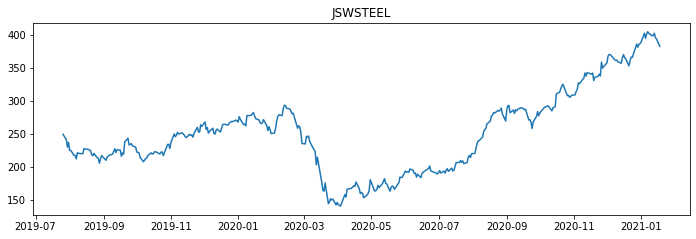

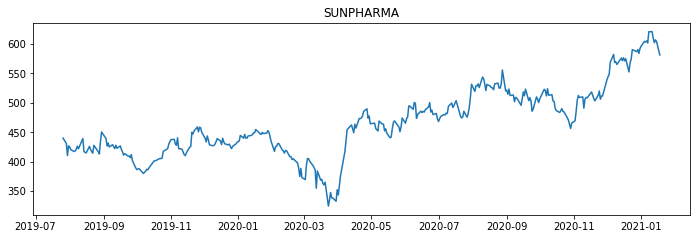

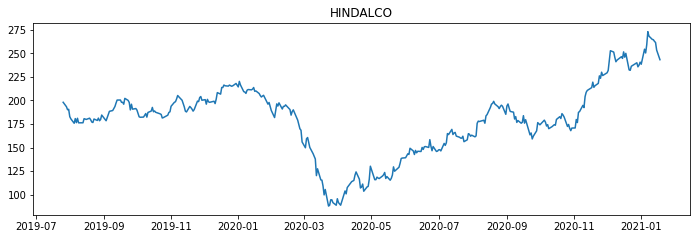

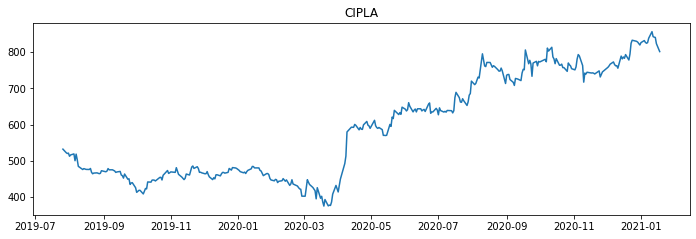

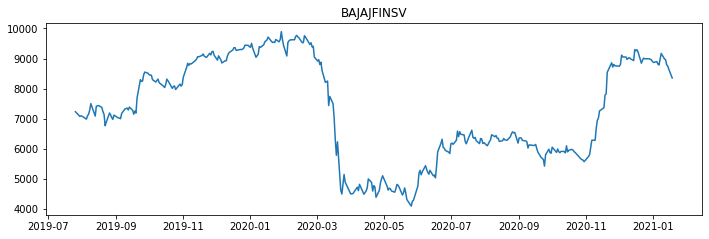

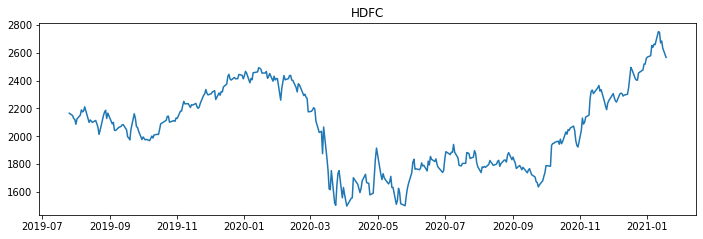

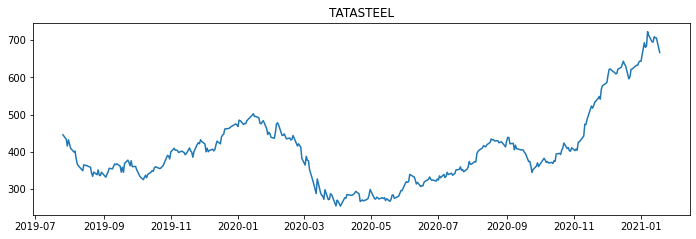

In [89]:
for i,tick in enumerate(company_name):
    plt.figure(figsize=(40, 12))
    ax = plt.subplot(3, 3, i+1)
    df_plot = call_df(tick).tail(365)
    ax.plot(df_plot["Date"],df_plot["Close"])
    ax.set_title(tick)
    plt.show()



# 2. What is the change in volume of stocks over time?
In this section we are analysing the movement of volume over time as previous section.

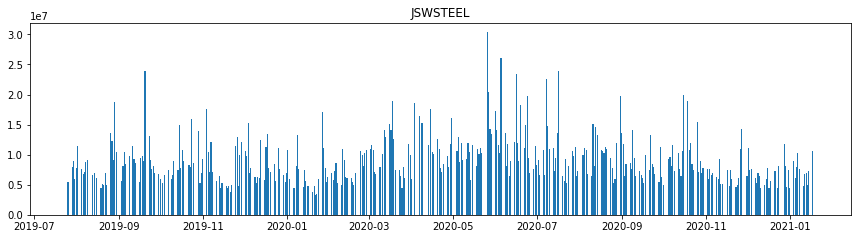

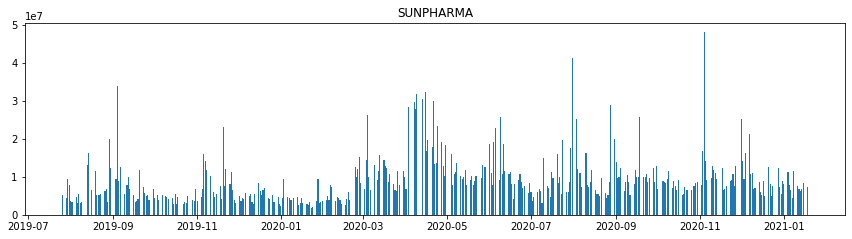

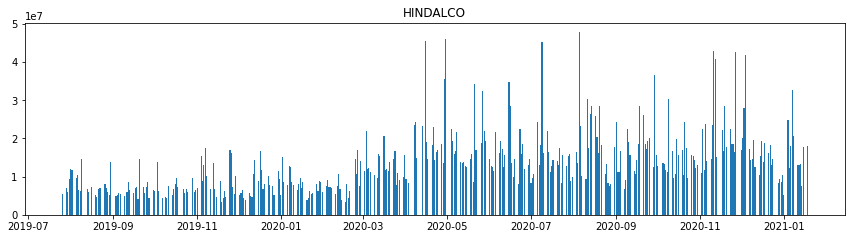

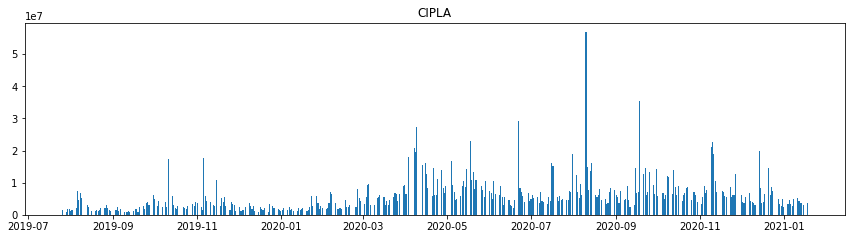

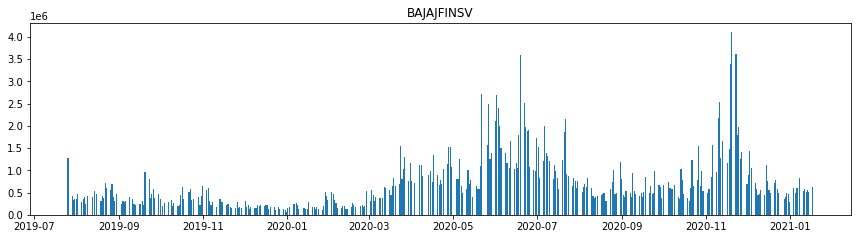

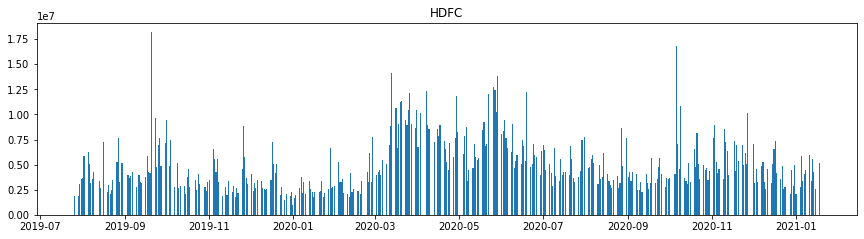

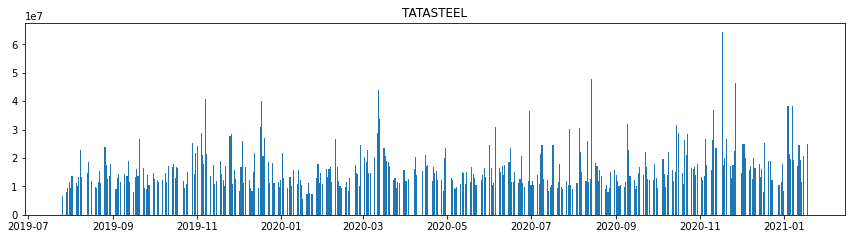

In [92]:
for i,tick in enumerate(company_name):
    plt.figure(figsize=(50, 12))
    ax = plt.subplot(3, 3, i+1)
    df_plot = call_df(tick).tail(365)
    ax.bar(df_plot["Date"],df_plot["Volume"])
    ax.set_title(tick)
    plt.show()

Here we are creating a dictionary of dataframe that is loaded from the csv file and asigning it with the tick as keys.

In [54]:
# Creating a dictionary of all dataframes.
company_dict={}
for company in company_name:
    print(company)
    company_dict[company] = call_df(company).tail(365)
    
company_dict[company_name[0]].head()

JSWSTEEL
SUNPHARMA
HINDALCO
CIPLA
BAJAJFINSV
HDFC
TATASTEEL


,Date,Open,High,Low,Close,Adj Close,Volume,tick
4031,2019-07-26,248.949997,253.350006,247.100006,249.699997,244.534088,5386836.0,JSWSTEEL
4032,2019-07-29,245.850006,246.250000,236.850006,241.399994,236.405807,7935024.0,JSWSTEEL
4033,2019-07-30,243.050003,248.000000,220.000000,230.250000,225.486481,8938349.0,JSWSTEEL
4034,2019-07-31,228.350006,238.300003,226.100006,237.449997,232.537537,5983362.0,JSWSTEEL
4035,2019-08-01,235.100006,235.800003,222.699997,225.250000,220.589920,7768510.0,JSWSTEEL


## Feature Engineering
- Calculate the moving average for 10, 20 and 30 days and add as a new feature into the dataframe.
- Calculate the daily % change of each stock using ```pct_change``` function in pandas.
- Add change in percentage as a new feature into the dataframe.

In [55]:
# initilization of days for creating feature moving average.

ma_day = [10, 20, 30]

# calculating moving average
for ma in ma_day:
    for company in company_name:
        company = company_dict[company]
        column_name = f"MA for {ma} days"
        company[column_name] = company["Adj Close"].rolling(ma).mean()

# calculating daily return
for company in company_name:
        company = company_dict[company]      
        company["Daily Return"] = company["Adj Close"].pct_change()


In [57]:
company_dict[company_name[0]]

,Date,Open,High,Low,Close,Adj Close,Volume,tick,MA for 10 days,MA for 20 days,MA for 30 days,Daily Return
4031,2019-07-26,248.949997,253.350006,247.100006,249.699997,244.534088,5386836.0,JSWSTEEL,NaN,NaN,NaN,NaN
4032,2019-07-29,245.850006,246.250000,236.850006,241.399994,236.405807,7935024.0,JSWSTEEL,NaN,NaN,NaN,-0.033240
4033,2019-07-30,243.050003,248.000000,220.000000,230.250000,225.486481,8938349.0,JSWSTEEL,NaN,NaN,NaN,-0.046189
4034,2019-07-31,228.350006,238.300003,226.100006,237.449997,232.537537,5983362.0,JSWSTEEL,NaN,NaN,NaN,0.031270
4035,2019-08-01,235.100006,235.800003,222.699997,225.250000,220.589920,7768510.0,JSWSTEEL,NaN,NaN,NaN,-0.051379
...,...,...,...,...,...,...,...,...,...,...,...,...
4393,2021-01-12,398.950012,412.950012,397.049988,399.549988,399.549988,6708618.0,JSWSTEEL,396.990002,382.687503,376.350001,0.001253
4394,2021-01-13,401.549988,407.399994,394.149994,402.950012,402.950012,6885599.0,JSWSTEEL,398.675003,384.540004,377.843335,0.008510
4395,2021-01-14,404.350006,405.649994,394.000000,396.399994,396.399994,4886430.0,JSWSTEEL,399.595001,385.830003,378.776668,-0.016255
4396,2021-01-15,398.000000,402.549988,391.200012,394.200012,394.200012,7329969.0,JSWSTEEL,400.045001,387.230003,379.555002,-0.005550


Concatenating  all the dataframes into single dataframe for grouping.

In [60]:
# concatenating dataframes
concat_df = pd.concat([company_dict[company_name[0]],company_dict[company_name[1]]], axis=0)
for i in range(2,6):
    concat_df = pd.concat([concat_df ,company_dict[company_name[i]]], axis=0)
concat_df.dropna(axis=0,inplace=True)
concat_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,tick,MA for 10 days,MA for 20 days,MA for 30 days,Daily Return
4060,2019-09-11,220.399994,228.949997,220.149994,227.699997,222.989243,11404495.0,JSWSTEEL,211.031853,214.094647,217.105213,0.037358
4061,2019-09-12,228.000000,232.250000,221.199997,222.050003,217.456146,9281462.0,JSWSTEEL,211.878958,214.165648,216.202615,-0.024813
4062,2019-09-13,222.050003,227.600006,219.100006,226.199997,221.520264,8639132.0,JSWSTEEL,213.881648,214.461890,215.706430,0.018689
4063,2019-09-16,222.500000,227.500000,222.500000,225.649994,220.981659,5494139.0,JSWSTEEL,215.223305,214.359062,215.556269,-0.002431
4064,2019-09-17,224.399994,229.000000,214.800003,216.199997,211.727173,9403320.0,JSWSTEEL,215.100891,213.822890,214.862591,-0.041879


Grouping the dataframe ```concat_df``` by tick and date for getting data as per tick.

In [62]:
# grouping dataframe
concat_df = concat_df.groupby(["tick","Date"]).sum()
concat_df.head()

Open         High  ...  MA for 30 days  Daily Return
tick       Date                                  ...                              
BAJAJFINSV 2019-09-11  7349.950195  7419.000000  ...     7143.229622      0.004130
           2019-09-12  7355.000000  7357.899902  ...     7145.193522     -0.008465
           2019-09-13  7303.950195  7399.750000  ...     7154.118522      0.013275
           2019-09-16  7314.850098  7385.000000  ...     7160.854736     -0.014685
           2019-09-17  7291.000000  7325.000000  ...     7162.608740     -0.017822

[5 rows x 10 columns]

# 3. What was the moving average of different stocks?
- We have created the feature for 10, 20 and 30 days of moving averages in feature engineering.
- Plot the different moving averages and closing price using plotly module.

In [66]:
jsw = concat_df.loc["JSWSTEEL",:].iloc[30:,:]

fig = px.line(y=jsw.loc[:,"MA for 10 days"], title='JSWSTEEL')
fig['data'][0]['showlegend']=True
fig['data'][0]['name']='MA for 10 days'

# 20 days moving average
fig.add_scatter(y=jsw['MA for 20 days'], mode='lines')
fig['data'][1]['showlegend']=True
fig['data'][1]['name']='MA for 20 days'

# 30 days moving average
fig.add_scatter(y=jsw['MA for 30 days'], mode='lines')
fig['data'][2]['showlegend']=True
fig['data'][2]['name']='MA for 30 days'

#Close Price
fig.add_scatter(y=jsw['Close'], mode='lines')
fig['data'][2]['showlegend']=True
fig['data'][2]['name']='Close Price'

fig.update_layout(width=1000,height=600)

In [67]:
def plot_chart(tick):    
    df = concat_df.loc[tick,:].iloc[30:,:]

    fig = px.line(y=df.loc[:,"MA for 10 days"], title=tick)
    fig['data'][0]['showlegend']=True
    fig['data'][0]['name']='MA for 10 days'

    # 20 days moving average
    fig.add_scatter(y=df['MA for 20 days'], mode='lines')
    fig['data'][1]['showlegend']=True
    fig['data'][1]['name']='MA for 20 days'

    # 30 days moving average
    fig.add_scatter(y=df['MA for 30 days'], mode='lines')
    fig['data'][2]['showlegend']=True
    fig['data'][2]['name']='MA for 30 days'

    #Close Price
    fig.add_scatter(y=df['Close'], mode='lines')
    fig['data'][3]['showlegend']=True
    fig['data'][3]['name']='Close Price'

    fig.update_layout(width=1000,height=600)
    return fig.show()

In [68]:
plot_chart('HDFC')

# 4. What is the distribution of each feature?
We are creating a function to plot the distribution histogram of each feature as per tick. 

In [70]:
def histogram(tick): 
    df = concat_df.loc[tick,:].iloc[30:,:]
    features = df.columns
    for feature in features:
        plt.hist(jsw[feature])
        plt.title(feature)
        plt.show()


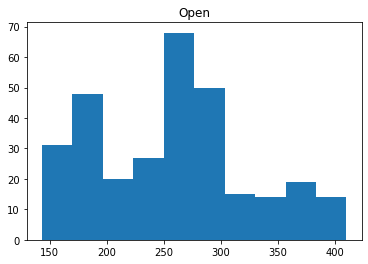

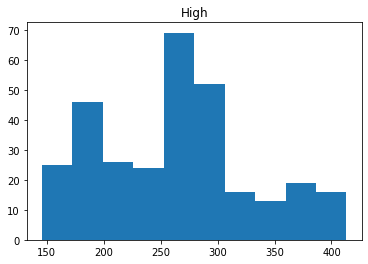

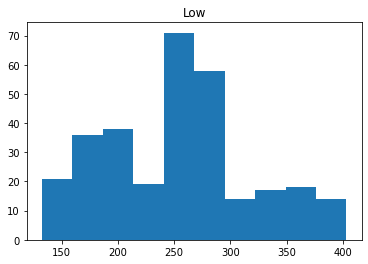

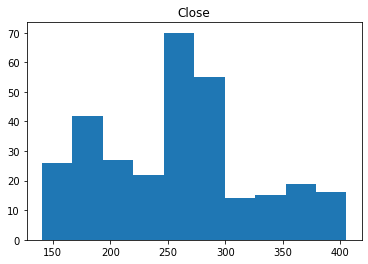

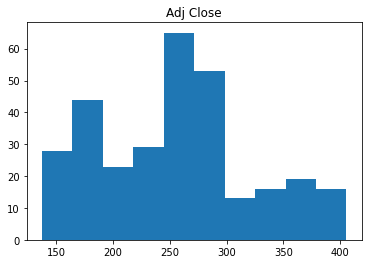

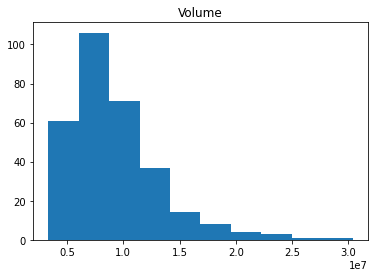

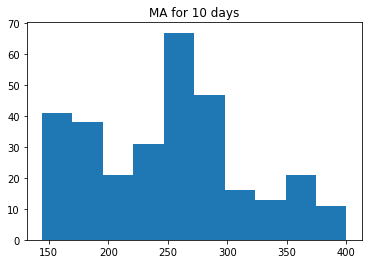

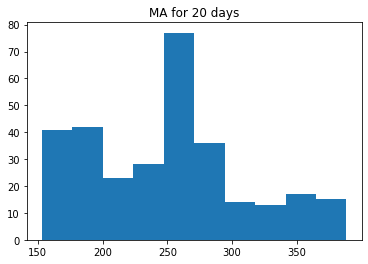

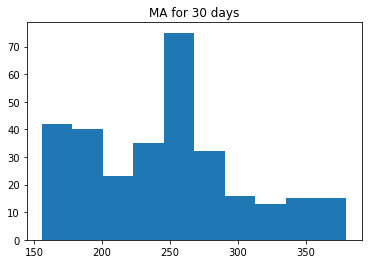

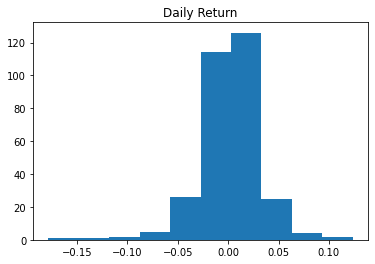

In [71]:
histogram("SUNPHARMA")

# 5. What is the daily return of the stock on an average?
Here we are creating subplots of daily return using matlplotlib library and analysing it.

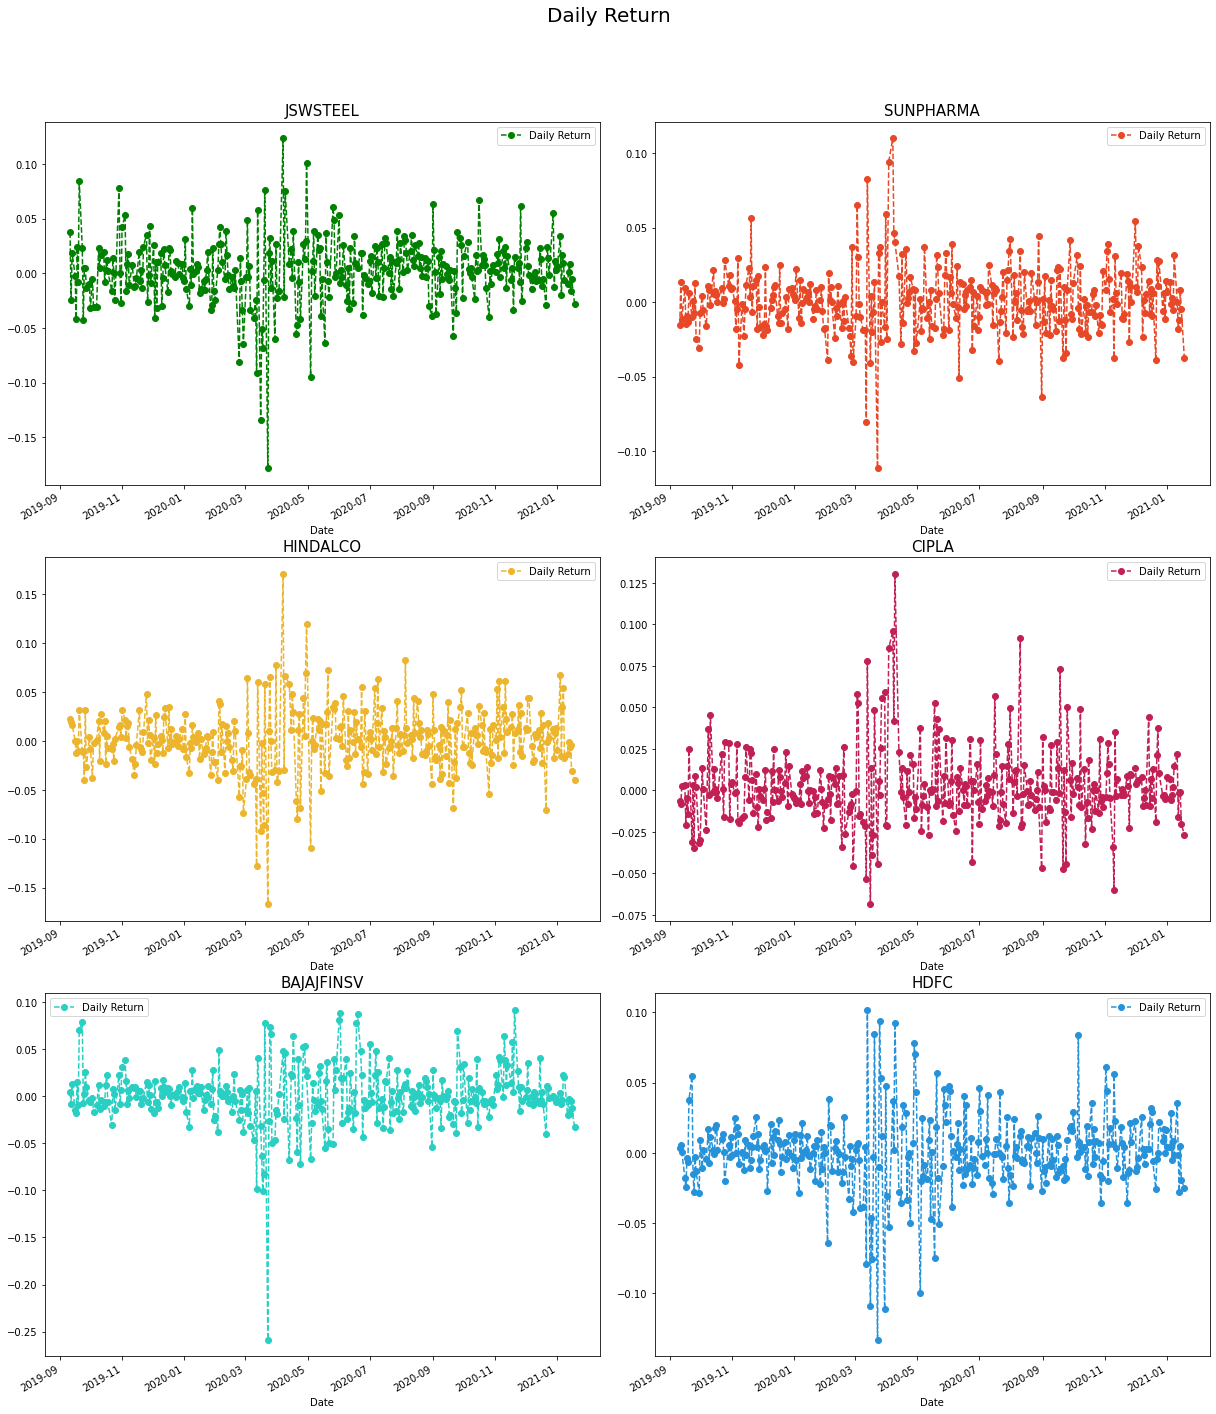

In [77]:
#Configuration of subplots
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(17)

concat_df.loc[company_name[0],'Daily Return'].plot(ax=axes[0,0],legend=True, linestyle= '--', marker = 'o', color='green')
axes[0,0].set_title(company_name[0],fontsize=15 )

concat_df.loc[company_name[1],'Daily Return'].plot(ax=axes[0,1],legend=True, linestyle= '--', marker = 'o', color='#e74827')
axes[0,1].set_title(company_name[1],fontsize=15 )

concat_df.loc[company_name[2],'Daily Return'].plot(ax=axes[1,0],legend=True, linestyle= '--', marker = 'o', color='#ecb52d')
axes[1,0].set_title(company_name[2],fontsize=15 )

concat_df.loc[company_name[3],'Daily Return'].plot(ax=axes[1,1],legend=True, linestyle= '--', marker = 'o', color='#c12055')
axes[1,1].set_title(company_name[3],fontsize=15 )

concat_df.loc[company_name[4],'Daily Return'].plot(ax=axes[2,0],legend=True, linestyle= '--', marker = 'o', color='#29cfc2')
axes[2,0].set_title(company_name[4],fontsize=15 )

concat_df.loc[company_name[5],'Daily Return'].plot(ax=axes[2,1],legend=True, linestyle= '--', marker = 'o', color='#2692da')
axes[2,1].set_title(company_name[5],fontsize=15 )

fig.suptitle('Daily Return', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

plt.show()